In [2]:
!pip install Biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [97]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
list_20aa = 'ARNDCQEGHILKMFPSTWYV'

In [11]:
in_fasta = 'RepeatsDB_36.fasta'
in_answer = 'RepeatsDB_36.answer.txt'

In [44]:
records = list(SeqIO.parse(in_fasta, "fasta"))
df_answer = pd.read_csv(in_answer, sep='\t',index_col=0)

In [45]:
df_answer.head()

,seq_len,start,end
ID,,,
P13489,461,3,456
P42771,156,10,135
Q51958,373,139,321
P17065,759,17,157
P81245,157,12,120


In [46]:
df_answer.loc['Q51958', ['start','end']]

start    139
end      321
Name: Q51958, dtype: int64

In [ ]:
for record in records:
    start_h = int(df_answer.loc[record.id, 'start'])
    end_h = int(df_answer.loc[record.id, 'end'])
    print(start_h, end_h)
    print(record.id, str(record.seq)[start_h-1:end_h])

In [75]:
list_20aa = 'ARNDCQEGHILKMFPSTWYV'
df_20aa = pd.DataFrame()
df_20aa.index = list(list_20aa)
df_20aa['in_repeat'] = 0
df_20aa['in_prot'] = 0
df_20aa.head()

,in_repeat,in_prot
A,0,0
R,0,0
N,0,0
D,0,0
C,0,0


In [60]:
record = records[0]
print(record.id, start_h, end_h)

start_h = int(df_answer.loc[record.id, 'start'])
end_h = int(df_answer.loc[record.id, 'end'])
repeat_h = str(record.seq)[start_h-1:end_h]
for aa in list(list_20aa):
    df_20aa.loc[aa, 'in_repeat'] += repeat_h.count(aa)
    df_20aa.loc[aa, 'in_prot'] += record.seq.count(aa)

P81245 10 135


In [ ]:
df_20aa

In [76]:
for record in records:
    start_h = int(df_answer.loc[record.id, 'start'])
    end_h = int(df_answer.loc[record.id, 'end'])
    repeat_h = str(record.seq)[start_h-1:end_h]
    for aa in list(list_20aa):
        df_20aa.loc[aa, 'in_repeat'] += repeat_h.count(aa)
        df_20aa.loc[aa, 'in_prot'] += record.seq.count(aa)
df_20aa

,in_repeat,in_prot
A,711,1402
R,391,693
N,582,972
D,565,951
C,147,236
Q,297,581
E,508,927
G,832,1386
H,185,306
I,558,898


In [85]:
df_20aa['norm_in_repeat'] = df_20aa['in_repeat']/sum(df_20aa['in_repeat'])
df_20aa['norm_in_prot'] = df_20aa['in_prot']/sum(df_20aa['in_prot'])
df_20aa['log_rep_prot'] = np.log(df_20aa['norm_in_repeat']/df_20aa['norm_in_prot'])
df_20aa.sort_values('log_rep_prot')

,in_repeat,in_prot,norm_in_repeat,norm_in_prot,log_rep_prot
S,666,1530,0.071636,0.091903,-0.249135
M,152,305,0.016349,0.018321,-0.113833
A,711,1402,0.076476,0.084214,-0.096384
P,357,700,0.038399,0.042047,-0.090746
Q,297,581,0.031946,0.034899,-0.088420
T,584,1127,0.062816,0.067696,-0.074815
E,508,927,0.054641,0.055682,-0.018874
L,841,1504,0.090459,0.090341,0.001306
R,391,693,0.042057,0.041627,0.010276
K,494,862,0.053135,0.051778,0.025879


In [87]:
df_answer['repeat'] = 0
df_answer['not_repeat'] = 0
df_answer['prot'] = 0

for record in records:
    start_h = int(df_answer.loc[record.id, 'start'])
    end_h = int(df_answer.loc[record.id, 'end'])
    len_h = int(df_answer.loc[record.id, 'seq_len'])
    repeat_h = str(record.seq)[start_h-1:end_h]
    not_repeat_h = str(record.seq)[0:start_h-1] + str(record.seq)[end_h:len_h]
    for aa in list(list_20aa):
        df_answer.loc[record.id, 'repeat'] += df_20aa.loc[aa, 'log_rep_prot'] * repeat_h.count(aa)
        df_answer.loc[record.id, 'not_repeat'] += df_20aa.loc[aa, 'log_rep_prot'] * not_repeat_h.count(aa)
        df_answer.loc[record.id, 'prot'] += df_20aa.loc[aa, 'log_rep_prot'] * record.seq.count(aa)
df_answer

,seq_len,start,end,repeat,prot,diff,not_repeat
ID,,,,,,,
P13489,461,3,456,-3.231689,-3.603950,0.372261,-0.372261
P42771,156,10,135,-0.615368,-1.848344,1.232977,-1.232977
Q51958,373,139,321,-0.605882,-0.916260,0.310377,-0.310377
P17065,759,17,157,-0.812069,-14.456385,13.644316,-13.644316
P81245,157,12,120,0.987423,1.604613,-0.617190,0.617190
Q309D1,395,5,381,12.394108,12.149735,0.244373,-0.244373
Q7ZA77,378,42,377,1.145431,-1.129570,2.275002,-2.275002
Q9AYY6,710,112,709,2.629457,3.809515,-1.180059,1.180059
P03474,466,107,461,4.100198,0.109827,3.990371,-3.990371


In [88]:
df_answer['diff'] = df_answer['repeat'] - df_answer['not_repeat']
df_answer.sort_values('diff')

,seq_len,start,end,repeat,prot,diff,not_repeat
ID,,,,,,,
P04115,432,107,159,-0.055806,5.438934,-5.550547,5.494741
P13489,461,3,456,-3.231689,-3.603950,-2.859428,-0.372261
O00105,564,20,563,-1.748226,-2.600513,-0.895938,-0.852288
Q97R46,459,250,435,2.476107,5.563233,-0.611019,3.087126
P17153,321,13,318,-0.354127,-0.348355,-0.359899,0.005772
Q51958,373,139,321,-0.605882,-0.916260,-0.295505,-0.310377
B0VB33,236,43,235,0.730693,1.678711,-0.217325,0.948018
P52293,529,89,482,-0.414135,-0.881644,0.053375,-0.467509
Q6MHS9,220,28,219,-0.208769,-0.609055,0.191518,-0.400286


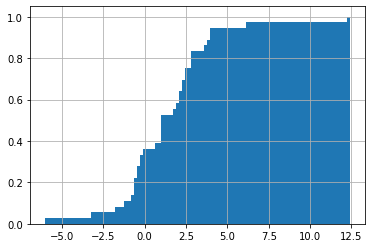

In [89]:
df_answer['repeat'].hist(cumulative=True, density=1, bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


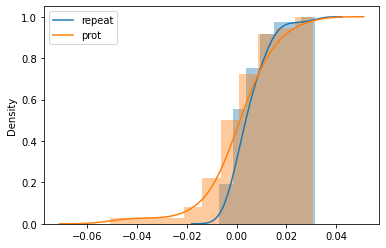

In [100]:
kwargs = {'cumulative': True}
sns.distplot(df_answer['repeat']/df_answer['seq_len'], hist_kws=kwargs, kde_kws=kwargs)
sns.distplot(df_answer['prot']/df_answer['seq_len'], hist_kws=kwargs, kde_kws=kwargs)
plt.legend(labels=['repeat','prot'])